# Lab 05: Flowers and Statistics

### Author: Declan Sheehan & Jack Stoetzel 

### Date: November 12, 2020

### Objectives:
1. Practice efficiently manipulating data with Python
2. Use the `matplotlib`, `pandas` libraries
3. Gain familiarity with statistical tools

In [10]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Summary Statistics:
# 
#                Min  Max   Mean    SD   Class Correlation
# sepal length:  4.3  7.9   5.84  0.83    0.7826   
# sepal width:   2.0  4.4   3.05  0.43   -0.4194
# petal length:  1.0  6.9   3.76  1.76    0.9490  (high!)
# petal width:   0.1  2.5   1.20  0.76    0.9565  (high!)

iris = pd.read_csv('./iris.data',
                      header=None,
                      skipinitialspace=True,
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
                     )
iris

FileNotFoundError: File b'./iris.data' does not exist

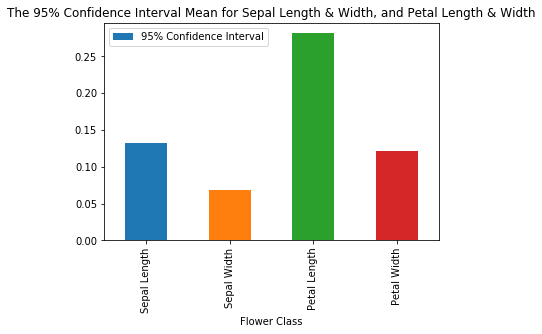

In [12]:
# 4. For each of the four numerical categories, compute the mean with a 95% confidence interval 
# and show them in a bar chart.

columns = iris.columns[0:4]

def ConfidenceInterval(Z, data):
    return (Z * (np.std(data) / math.sqrt(data.count())))

Q4_data = []

for col in columns:
    Q4_data.append(ConfidenceInterval(1.960, iris[col]))
    
Q4 = pd.DataFrame({'Flower Class': ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],
                  '95% Confidence Interval': Q4_data})

Q4.plot.bar(x='Flower Class', y='95% Confidence Interval', 
           title='The 95% Confidence Interval Mean for Sepal Length & Width, and Petal Length & Width')

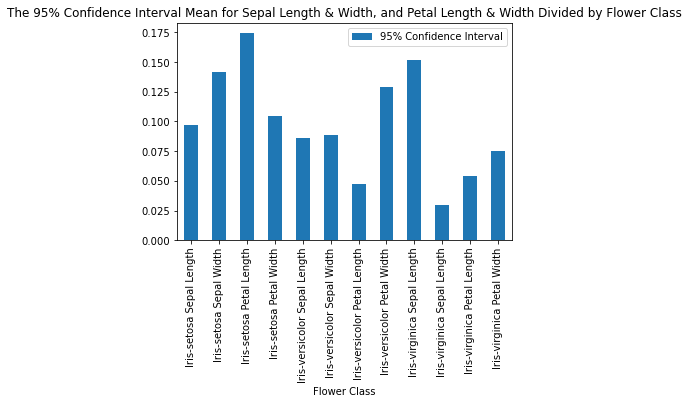

In [4]:
# 5. Next, compute the mean of sepal and petal measurements with 95% confidence intervals, 
# but this time separated by each of the three classes (so you will have a total of 12 bars and intervals).

Q5_data = []
for col in columns:
    Q5_data.append(ConfidenceInterval(1.960, iris[col].head(50)))
    Q5_data.append(ConfidenceInterval(1.960, pd.concat([iris.head(100), iris.head(50)]).drop_duplicates(keep=False)[col]))
    Q5_data.append(ConfidenceInterval(1.960, iris[col].tail(50)))
    
Q5 = pd.DataFrame({'Flower Class': ['Iris-setosa Sepal Length', 'Iris-setosa Sepal Width', 
                                    'Iris-setosa Petal Length', 'Iris-setosa Petal Width',
                                    'Iris-versicolor Sepal Length','Iris-versicolor Sepal Width', 
                                    'Iris-versicolor Petal Length', 'Iris-versicolor Petal Width',
                                    'Iris-virginica Sepal Length', 'Iris-virginica Sepal Length', 
                                    'Iris-virginica Petal Length', 'Iris-virginica Petal Width'],
                    '95% Confidence Interval': Q5_data})
# import pylab as pl
Q5.plot.bar(x='Flower Class', y='95% Confidence Interval', rot=90, 
            title='The 95% Confidence Interval Mean for Sepal Length & Width, and Petal Length & Width Divided by Flower Class')

In [5]:
# 6 (a and b). From the two mean estimates above, draw at least one relationship conclusion 
# (e.g. the mean of X is larger than the mean of Y ) 
# and find the p-value that shows the strength of that conclusion. 
# Does this mean you can reject your hypothesis or not?

### Looking at the data, I claim that the mean for Iris-setosa Petal length mean is greater than Iris-versicolor Petal Length mean.
- Our sample size is: **50.** $( = n_1 = n_2)$
- The mean for Iris-setosa Petal Length is: **0.17448536039450416.** $(\overline{x}_1)$
- The mean for Iris-versicolor Petal Length is: **0.0476114621493606.** $(\overline{x}_2)$
- The standard deviation for petal lengths is: **1.785.** $(= s_1 = s_2)$

We can calculate the combined **standard deviation** by using:
$ s = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2)}{n_1 + n_2 - 2}} $

where $n_1$ is the first mean, and $n_2$ is the second mean, and $s_1 , s_2$ is the standard deviation for the petal lengths.

Then, we calculate the **standard error** by using:
$ se = s*\sqrt{1/n_1 + 1/n_2} $

Lastly, we calulcate the **t-statistic** by using:
$ t = \frac{\overline{x_1} - \overline{x_2}}{se} $

(Using two-tailed & degress of freedom = 98) the p-value is: **0.717387.**

With a p-value like that, the strength of this conclusion is **not strong** as it is not statistically significant (p < 0.05). This means that we cannot reject my hypothesis: $ H_0 = \overline{x}_1 > \overline{x}_2 $ (We fail to reject it).

Judging from the below histogram of the iris data, the petal width looks the most like a normal distribution. The others do not really look like a normal distribution. Depending on the p-value and the distribution of the data, it will tell us whether the data gathered from this accurately represents the set of data. Since the p-value represents the probability (area under the curve) of the result, we can say that the normal distribution is more accurately represented for the petal width, BUT if the data is not normal, this may throw the p-value off depending on the data being observed. That is why more information other than the p-value is important.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84843b1b20>,
      dtype=object)

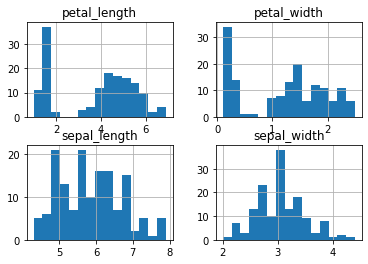

In [6]:
histo = iris
histo.hist(bins=15)

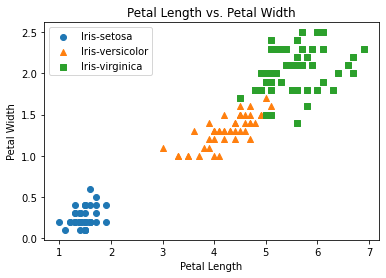

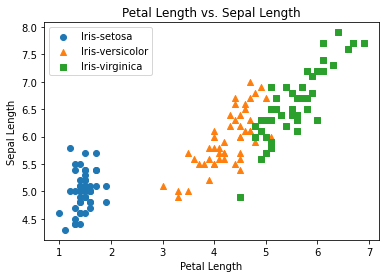

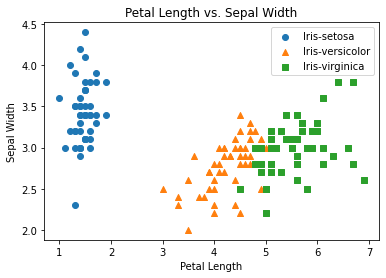

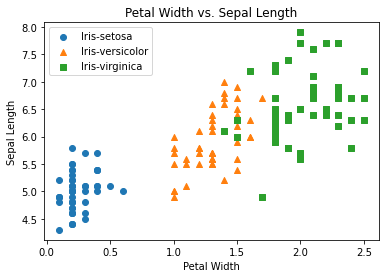

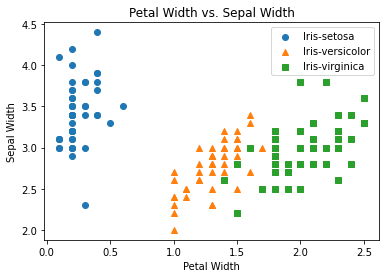

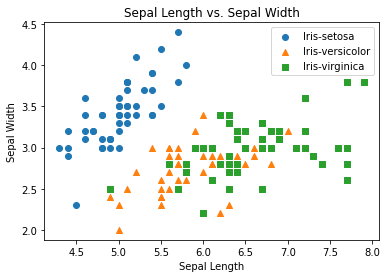

In [7]:
# 7. Among the sepal/petal length/width measurements, we can define six different pairwise comparisons 
# (sepal length vs petal width, sepal length vs sepal width, etc.); show these two parameters together 
# in (six) different scatter plots, where each class is shown by a different color and shape marker.

plt.scatter(x=iris[iris['class']=='Iris-setosa']['petal_length'], 
            y=iris[iris['class']=='Iris-setosa']['petal_width'], 
            marker='o')
plt.scatter(x=iris[iris['class']=='Iris-versicolor']['petal_length'], 
            y=iris[iris['class']=='Iris-versicolor']['petal_width'],
            marker='^')
plt.scatter(x=iris[iris['class']=='Iris-virginica']['petal_length'], 
            y=iris[iris['class']=='Iris-virginica']['petal_width'], 
            marker='s')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Length vs. Petal Width')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

plt.scatter(x=iris[iris['class']=='Iris-setosa']['petal_length'], 
            y=iris[iris['class']=='Iris-setosa']['sepal_length'], 
            marker='o')
plt.scatter(x=iris[iris['class']=='Iris-versicolor']['petal_length'], 
            y=iris[iris['class']=='Iris-versicolor']['sepal_length'], 
            marker='^')
plt.scatter(x=iris[iris['class']=='Iris-virginica']['petal_length'], 
            y=iris[iris['class']=='Iris-virginica']['sepal_length'], 
            marker='s')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.title('Petal Length vs. Sepal Length')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

plt.scatter(x=iris[iris['class']=='Iris-setosa']['petal_length'], 
            y=iris[iris['class']=='Iris-setosa']['sepal_width'], 
            marker='o')
plt.scatter(x=iris[iris['class']=='Iris-versicolor']['petal_length'], 
            y=iris[iris['class']=='Iris-versicolor']['sepal_width'], 
            marker='^')
plt.scatter(x=iris[iris['class']=='Iris-virginica']['petal_length'], 
            y=iris[iris['class']=='Iris-virginica']['sepal_width'], 
            marker='s')
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Petal Length vs. Sepal Width')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

plt.scatter(x=iris[iris['class']=='Iris-setosa']['petal_width'], 
            y=iris[iris['class']=='Iris-setosa']['sepal_length'], 
            marker='o')
plt.scatter(x=iris[iris['class']=='Iris-versicolor']['petal_width'], 
            y=iris[iris['class']=='Iris-versicolor']['sepal_length'], 
            marker='^')
plt.scatter(x=iris[iris['class']=='Iris-virginica']['petal_width'], 
            y=iris[iris['class']=='Iris-virginica']['sepal_length'], 
            marker='s')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.title('Petal Width vs. Sepal Length')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

plt.scatter(x=iris[iris['class']=='Iris-setosa']['petal_width'], 
            y=iris[iris['class']=='Iris-setosa']['sepal_width'], 
            marker='o')
plt.scatter(x=iris[iris['class']=='Iris-versicolor']['petal_width'], 
            y=iris[iris['class']=='Iris-versicolor']['sepal_width'], 
            marker='^')
plt.scatter(x=iris[iris['class']=='Iris-virginica']['petal_width'], 
            y=iris[iris['class']=='Iris-virginica']['sepal_width'], 
            marker='s')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.title('Petal Width vs. Sepal Width')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

plt.scatter(x=iris[iris['class']=='Iris-setosa']['sepal_length'], 
            y=iris[iris['class']=='Iris-setosa']['sepal_width'], 
            marker='o')
plt.scatter(x=iris[iris['class']=='Iris-versicolor']['sepal_length'], 
            y=iris[iris['class']=='Iris-versicolor']['sepal_width'], 
            marker='^')
plt.scatter(x=iris[iris['class']=='Iris-virginica']['sepal_length'], 
            y=iris[iris['class']=='Iris-virginica']['sepal_width'], 
            marker='s')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width')
plt.legend(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.show()

In [8]:
# 7.a. What is the correlation coefficient for each pair of measurements when class is disregarded?
# print(iris.corr(method ='pearson') )
# print(iris.corr(method ='kendall') )
# print(iris.corr(method ='spearman') )
corr = iris.corr()
print(f"Petal Length vs. Petal Width = {corr['petal_length']['petal_width']:.6}")
print(f"Petal Length vs. Sepal Length = {corr['petal_length']['sepal_length']:.6}")
print(f"Petal Length vs. Sepal Width = {corr['petal_length']['sepal_width']:.6}")
print(f"Petal Width vs. Sepal Length = {corr['petal_width']['sepal_length']:.6}")
print(f"Petal Width vs. Sepal Width = {corr['petal_width']['sepal_width']:.6}")
print(f"Sepal Length vs. Sepal Width = {corr['sepal_length']['sepal_width']:.6}")

Petal Length vs. Petal Width = 0.962757
Petal Length vs. Sepal Length = 0.871754
Petal Length vs. Sepal Width = -0.420516
Petal Width vs. Sepal Length = 0.817954
Petal Width vs. Sepal Width = -0.356544
Sepal Length vs. Sepal Width = -0.109369


In [9]:
# 7.b. What is the correlation coefficient for each pair of measurements when taking into account 
# only measurements within the same class. I.e. what is the correlation between sepal length and width overall, 
# and what is the correlation coefficient between sepal length and width among the 
# Setosa class, Versicolour class, and Virginica class?

print('Iris Setosa')
corr = iris[iris['class'] == 'Iris-setosa'].corr()
print(f"Petal Length vs. Petal Width = {corr['petal_length']['petal_width']:.6}")
print(f"Petal Length vs. Sepal Length = {corr['petal_length']['sepal_length']:.6}")
print(f"Petal Length vs. Sepal Width = {corr['petal_length']['sepal_width']:.6}")
print(f"Petal Width vs. Sepal Length = {corr['petal_width']['sepal_length']:.6}")
print(f"Petal Width vs. Sepal Width = {corr['petal_width']['sepal_width']:.6}")
print(f"Sepal Length vs. Sepal Width = {corr['sepal_length']['sepal_width']:.6}")
print()

print('Iris Vesicolor')
corr = iris[iris['class'] == 'Iris-versicolor'].corr()
print(f"Petal Length vs. Petal Width = {corr['petal_length']['petal_width']:.6}")
print(f"Petal Length vs. Sepal Length = {corr['petal_length']['sepal_length']:.6}")
print(f"Petal Length vs. Sepal Width = {corr['petal_length']['sepal_width']:.6}")
print(f"Petal Width vs. Sepal Length = {corr['petal_width']['sepal_length']:.6}")
print(f"Petal Width vs. Sepal Width = {corr['petal_width']['sepal_width']:.6}")
print(f"Sepal Length vs. Sepal Width = {corr['sepal_length']['sepal_width']:.6}")
print()

print('Iris Virginica')
corr = iris[iris['class'] == 'Iris-virginica'].corr()
print(f"Petal Length vs. Petal Width = {corr['petal_length']['petal_width']:.6}")
print(f"Petal Length vs. Sepal Length = {corr['petal_length']['sepal_length']:.6}")
print(f"Petal Length vs. Sepal Width = {corr['petal_length']['sepal_width']:.6}")
print(f"Petal Width vs. Sepal Length = {corr['petal_width']['sepal_length']:.6}")
print(f"Petal Width vs. Sepal Width = {corr['petal_width']['sepal_width']:.6}")
print(f"Sepal Length vs. Sepal Width = {corr['sepal_length']['sepal_width']:.6}")
print()

Iris Setosa


KeyError: 'class'